In [1]:
import numpy as np
import pandas as pd
import difflib
import json

import networkx as nx
import warnings
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [5]:
G = nx.read_edgelist('/Users/Cava/Downloads/Network_finale_12_07.csv', data=(('weight',int),('industry',int)), delimiter=",")

In [6]:
NNODES = G.number_of_nodes()
NNODES

NEDGES = G.number_of_edges()
NEDGES

LMAX = (NNODES * NNODES - 1) / 2

print("Number of Nodes: ", NNODES)
print("Number of Edged: ", NEDGES)
print("LMAX: ", LMAX)

Number of Nodes:  14875
Number of Edged:  43932
LMAX:  110632812.0


# Sintetic graphs

### Erdos-Renyi (random) graphs

- n (int) – The number of nodes.
- p (float) – Probability for edge creation.

In [ ]:
# network generators 1 (random graphs)
er = nx.erdos_renyi_graph(NNODES, p=0.00039, directed = False, seed = 42) 

In [ ]:
er.number_of_edges()

### Watts-Strogatz (small world) graphs

- n (int) – The number of nodes
- k (int) – Each node is joined with its k nearest neighbors in a ring topology.
- p (float) – The probability of rewiring each edge

In [ ]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(NNODES, k=6, p=0.1, seed = 42)

In [ ]:
ws.number_of_edges()

### Barabasi-Albert (scale-free) graphs

- n (int) – Number of nodes
- m (int) – Number of edges to attach from a new node to existing nodes

In [ ]:
# network generators 3 (preferential attachment)
ba = nx.barabasi_albert_graph(NNODES, m=3, seed = 42)

In [ ]:
ba.number_of_edges()

### Configuration model

In [ ]:
# fitting the degree distribution of the previous BA example
sequence = [i[1] for i in ba.degree()]

cm = nx.configuration_model(sequence)

In [12]:
cm.number_of_edges()

44616

# Path analysis

In [13]:
comps = list(nx.connected_components(G))
print("Number of Connected Components (G): ", len(comps))

print("Diameter (G) :", nx.diameter(G.subgraph(comps[0])))
print("Average shortest path (G):", nx.average_shortest_path_length(G.subgraph(comps[0])))
print("Average shortest path weighted (G):", nx.average_shortest_path_length(G.subgraph(comps[0]), weight='weight'))

Number of Connected Components (G):  717
Diameter (G) : 11
Average shortest path (G): 3.9784086679916113
Average shortest path weighted (G): 9.078180252712801


In [14]:
comps = list(nx.connected_components(er))
print("Number of Connected Components (ER): ", len(comps))

print("Diameter (ER) :", nx.diameter(er.subgraph(comps[0])))
print("Average shortest path (ER):", nx.average_shortest_path_length(er.subgraph(comps[0])))

Number of Connected Components (ER):  56
Diameter (ER) : 11
Average shortest path (ER): 5.674166680791608


In [17]:
comps = list(nx.connected_components(ws))
print("Number of Connected Components (WS): ", len(comps))

print("Diameter (WS) :", nx.diameter(ws.subgraph(comps[0])))
print("Average shortest path (WS):", nx.average_shortest_path_length(ws.subgraph(comps[0])))

Number of Connected Components (WS):  1
Diameter (WS) : 16
Average shortest path (WS): 9.036218137113659


In [16]:
comps = list(nx.connected_components(ba))
print("Number of Connected Components (BA): ", len(comps))
        
print("Diameter (BA) :", nx.diameter(ba.subgraph(comps[0])))
print("Average shortest path (BA):", nx.average_shortest_path_length(ba.subgraph(comps[0])))

Number of Connected Components (BA):  1
Diameter (BA) : 7
Average shortest path (BA): 4.410872776702452


In [17]:
comps = list(nx.connected_components(cm))
print("Number of Connected Components (CM): ", len(comps))

print("Diameter (CM) :", nx.diameter(ba.subgraph(comps[0])))
print("Average shortest path (CM):", nx.average_shortest_path_length(ba.subgraph(comps[0])))

Number of Connected Components (CM):  1
Diameter (CM) : 7
Average shortest path (CM): 4.410872776702452


# Clustering coefficient, Density Analysis

In [18]:
print("Average clustering (G) :", nx.average_clustering(G))
print("Density (G) :", nx.density(G))

Average clustering (G) : 0.597037984278386
Density (G) : 0.00039712407754549986


In [19]:
print("Average clustering (ER) :", nx.average_clustering(er))
print("Density (ER) :", nx.density(er))

Average clustering (ER) : 0.0003334700780078929
Density (ER) : 0.00038820207389127497


In [16]:
print("Average clustering (WS) :", nx.average_clustering(ws))
print("Density (WS) :", nx.density(ws))

Average clustering (WS) : 0.4425117780445636
Density (WS) : 0.0004033884630899556


In [21]:
print("Average clustering (BA) :", nx.average_clustering(ba))
print("Density (BA) :", nx.density(ba))

Average clustering (BA) : 0.003913165465895828
Density (BA) : 0.0004033071074335341


In [22]:
 1.1e+02# print("Average clustering (CM) :", nx.average_clustering(cm)) 
# Non si può calcolare l'avarage clustering per il cm perchè è un multigrafo (la funzione restituisce sempre un multigrafo)

print("Density (CM) :", nx.density(cm))

Density (CM) : 0.0004033071074335341


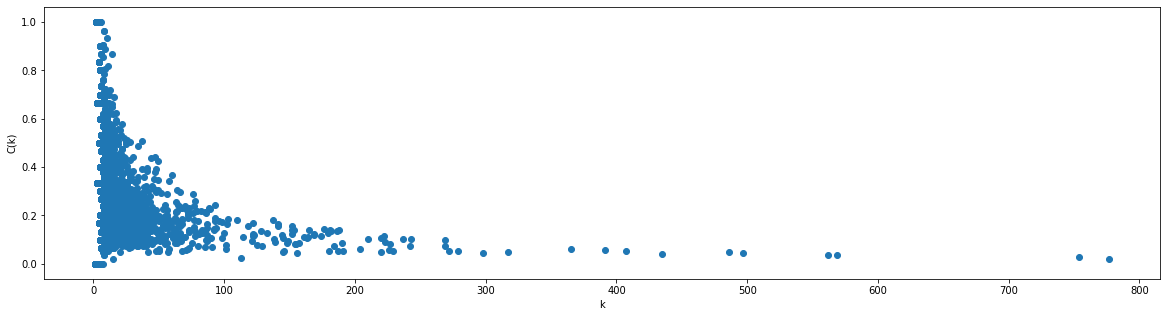

In [23]:
degrees = G.degree()

y = []
x = []

for degree in degrees:
    node = degree[0]
    degree = degree[1]
    local_clustering_coefficient = nx.clustering(G,node)
    
    y.append(local_clustering_coefficient)
    x.append(degree)

    
plt.figure(figsize=(20,5))
plt.scatter(x, y)

plt.xlabel("k")
plt.ylabel("C(k)")

plt.show()